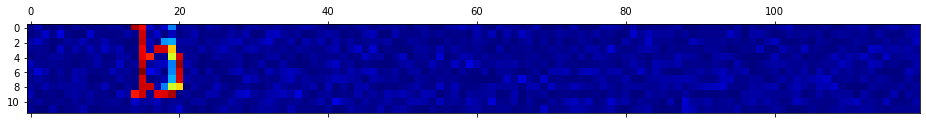

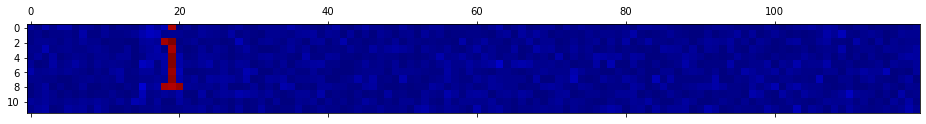

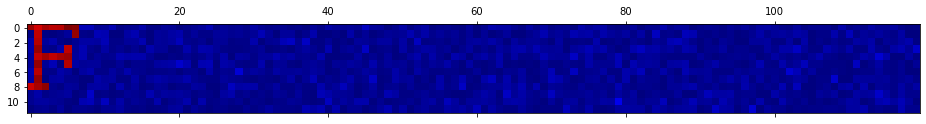

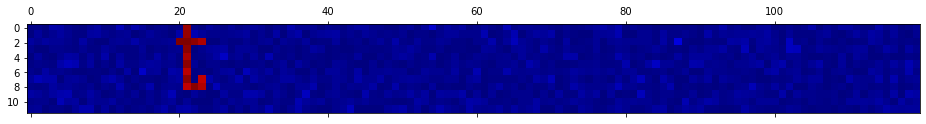

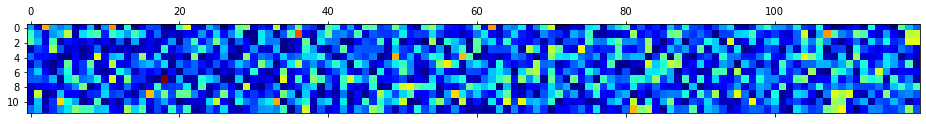

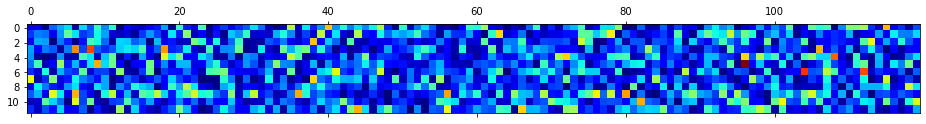

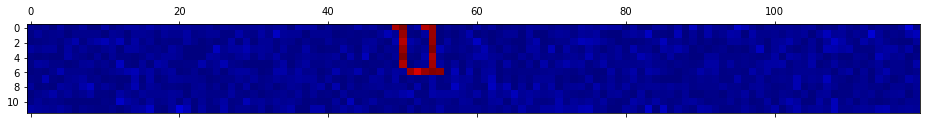

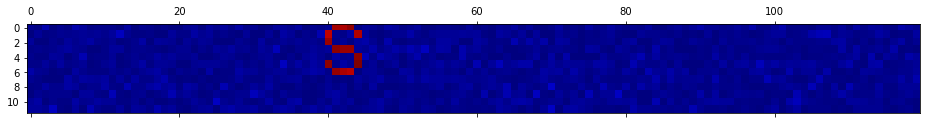

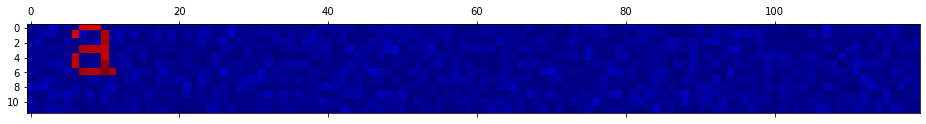

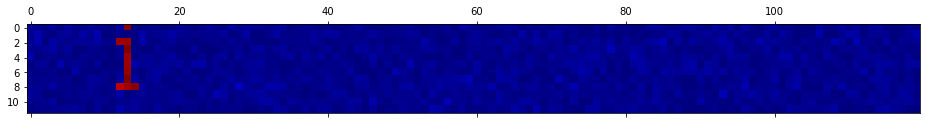

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import FastICA

image_height=12
noofcomponents=10
image_width=image_height*noofcomponents
image_shape=(image_height,image_width)
noofpixels=image_height*image_width

datafilename='A_challenge_for_Chisom.hdf5'

from tables import *

# Create Sample/Row types
class WordImage(IsDescription):
    idnumber  = Int64Col()      # Signed 64-bit integer
    image = Float64Col(image_shape)    # double (double-precision)

# Create ICA dataset for individual student
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images


new_array =list()
for x in ImagesTable.iterrows(1,3000):
    d_img= x['image'].reshape(1440,1)
    new_array.append(d_img)
    
stack_new_array = np.hstack(new_array)
ica = FastICA(n_components = 12)

ICA_array = ica.fit_transform(stack_new_array)
abs_value = np.absolute(ICA_array)

    
final_array = [abs_value[:,y].reshape(12,120)for y in range(10)]
for y in range(10):
    plt.matshow(final_array[y], interpolation='nearest', cmap=cm.jet)
    plt.show()

    

              

ImagesTable.close()